In [1]:
import sklearn

import pandas as pd
import numpy as np

import datetime

In [4]:
df = pd.read_csv('data\cars.csv')

df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,Model
0,18.0,8,307.0,130.0,3504,12.0,70,1.0,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,1.0,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,1.0,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,1.0,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,1.0,"\t""ford torino"""


In [5]:
df["Model"] = df["Model"].str.replace('\t','')
df["Model"] = df["Model"].str.replace('"','')

In [6]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,Model
0,18.0,8,307.0,130.0,3504,12.0,70,1.0,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1.0,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1.0,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1.0,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1.0,ford torino


In [7]:
df.isna().sum()

MPG             8
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Year            0
Origin          0
Model           0
dtype: int64

In [8]:
df['MPG'] = df['MPG'].fillna(df['MPG'].mean())

df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Year            0
Origin          0
Model           0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.drop(['Model'], axis=1, inplace=True)

In [11]:
df.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
169,15.0,6,258.0,110.0,3730,19.0,75,1.0
124,29.0,4,68.0,49.0,1867,19.5,73,2.0
199,22.0,6,250.0,105.0,3353,14.5,76,1.0
145,14.0,8,318.0,150.0,4457,13.5,74,1.0
398,32.0,4,144.0,96.0,2665,13.9,82,3.0


In [12]:
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Year              int64
Origin          float64
dtype: object

In [13]:
df.to_csv('data\cars_processed.csv', index=False)

Text(0, 0.5, 'Miles per galon')

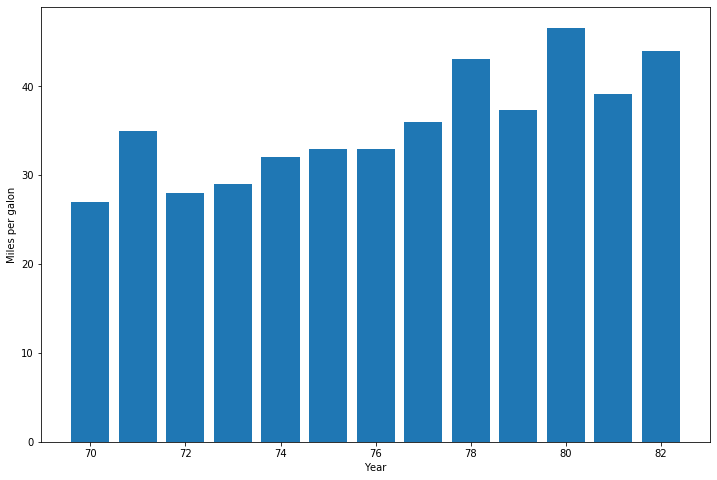

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.bar(df['Year'], df['MPG'])
plt.xlabel('Year')
plt.ylabel('Miles per galon')

Text(0, 0.5, 'Miles per galon')

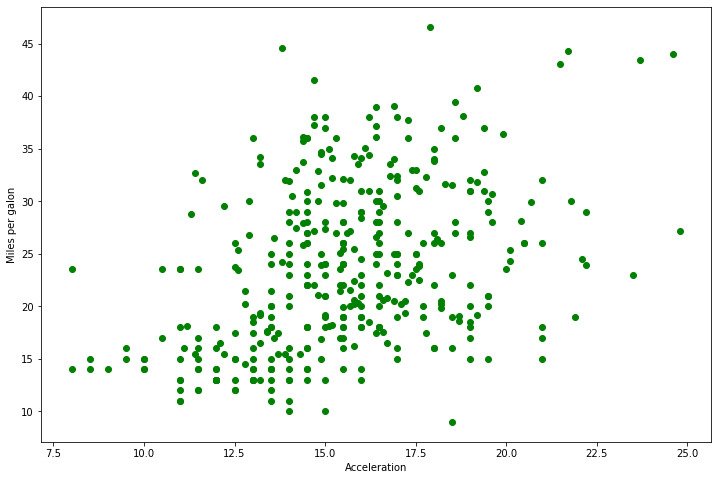

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(df['Acceleration'], df['MPG'], color='g')
plt.xlabel('Acceleration')
plt.ylabel('Miles per galon')

Text(0, 0.5, 'Miles per galon')

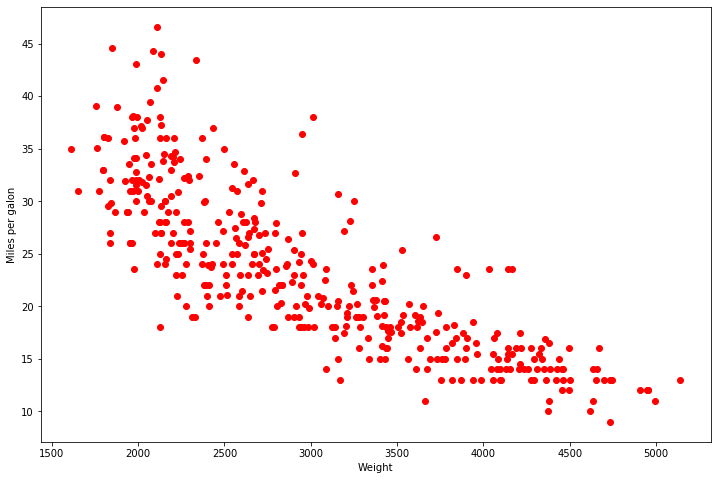

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(df['Weight'], df['MPG'], color='r')
plt.xlabel('Weight')
plt.ylabel('Miles per galon')

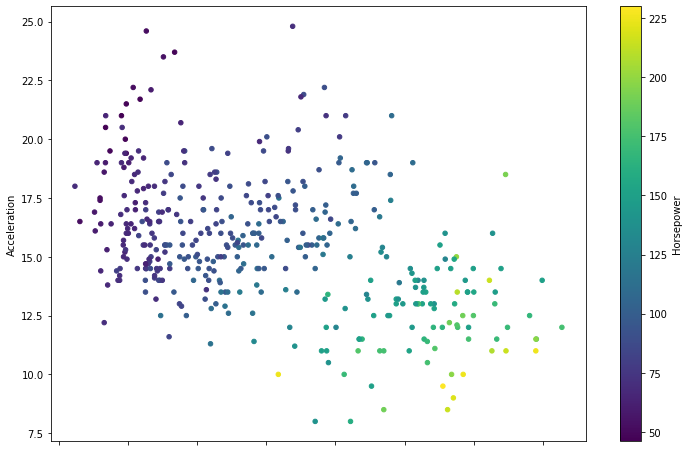

In [18]:
df.plot.scatter(x='Weight',
               y='Acceleration',
               c='Horsepower',
               colormap='viridis',
               figsize=(12,8));

Text(0, 0.5, 'Miles per galon')

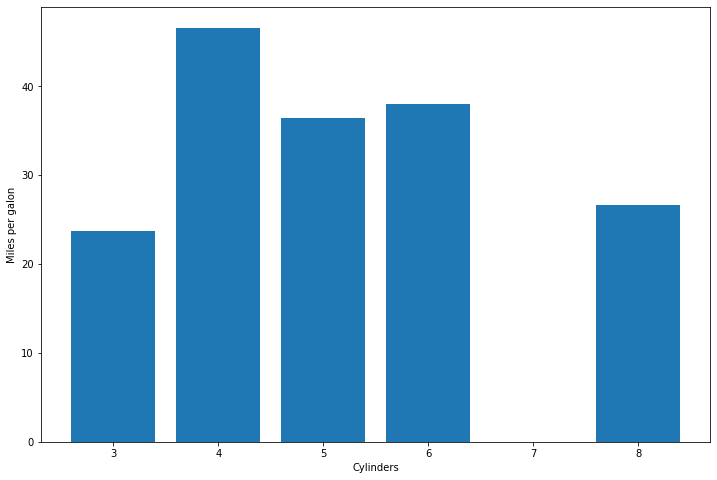

In [19]:
plt.figure(figsize=(12,8))
plt.bar(df['Cylinders'], df['MPG'])
plt.xlabel('Cylinders')
plt.ylabel('Miles per galon')

In [20]:
df.drop(['Cylinders','Origin'], axis=1, inplace=True)

df.sample(10)

,MPG,Displacement,Horsepower,Weight,Acceleration,Year
251,43.1,90.0,48.0,1985,21.5,78
62,27.0,97.0,60.0,1834,19.0,71
179,25.0,90.0,71.0,2223,16.5,75
50,13.0,400.0,170.0,4746,12.0,71
173,13.0,302.0,129.0,3169,12.0,75
34,9.0,304.0,193.0,4732,18.5,70
108,23.0,198.0,95.0,2904,16.0,73
350,39.1,79.0,58.0,1755,16.9,81
335,30.0,146.0,67.0,3250,21.8,80
0,18.0,307.0,130.0,3504,12.0,70


In [21]:
cars_corr = df.corr()
cars_corr

,MPG,Displacement,Horsepower,Weight,Acceleration,Year
MPG,1.000000,-0.792057,-0.764927,-0.823729,0.412062,0.566542
Displacement,-0.792057,1.000000,0.898326,0.932629,-0.558107,-0.381360
Horsepower,-0.764927,0.898326,1.000000,0.866586,-0.697124,-0.424419
Weight,-0.823729,0.932629,0.866586,1.000000,-0.429480,-0.317769
Acceleration,0.412062,-0.558107,-0.697124,-0.429480,1.000000,0.304052
Year,0.566542,-0.381360,-0.424419,-0.317769,0.304052,1.000000


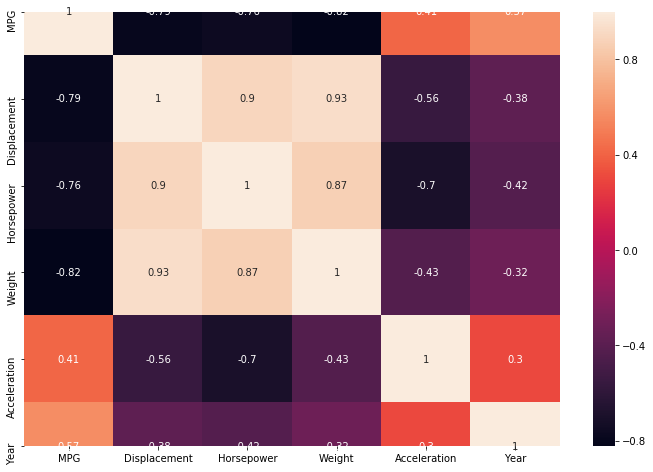

In [23]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(cars_corr, annot=True)